## After Correcting the network based on what I learnt in EVA - 
- Train Accuracy increased from 91.63 To 94.39
- Validation Accuracy increased from 82.71 To 82.81

### Corrections Done:
- Added Batch Normalization
- Added 1x1 convolutions in the transition block
- Removed Dense layers


##### NOTE: I have also removed ImageDataGenerator, because I am still trying to understand how it works (in the previous assigment, training accuracy was lower) and therefore I thought I would learn a little more about it before applying it.

### Import the required modules and set seed for numpy operations

In [0]:
from keras import backend as K
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.datasets import cifar10
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import time

% matplotlib inline
np.random.seed(2017) 

Using TensorFlow backend.


### Examine Input Data

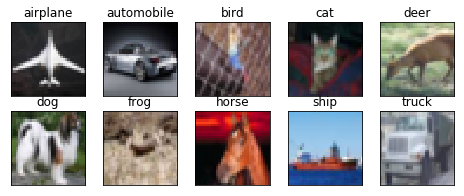

In [0]:
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))


class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

### Defining required functions:
- plotting model history
- calculating accuracy
- learning rate scheduler

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

    
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)


def scheduler(epoch, lr):
    return round(0.003 * 1/(1 + 0.319 * epoch), 10)

### Convert labels to categorical & train data to float from int

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

### Base model (which needs to be corrected and accuracy improved) for the assignment given below

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Print model summary
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

### Train the model

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 13s 32ms/step - loss: 1.8583 - acc: 0.2918 - val_loss: 1.4693 - val_acc: 0.4672
Epoch 2/100
390/390 [==============================] - 9s 24ms/step - loss: 1.3506 - acc: 0.5115 - val_loss: 1.1132 - val_acc: 0.5970
Epoch 3/100
390/390 [==============================] - 9s 23ms/step - loss: 1.1433 - acc: 0.5947 - val_loss: 1.0126 - val_acc: 0.6409
Epoch 4/100
390/390 [==============================] - 9s 23ms/step - loss: 1.0197 - acc: 0.6403 - val_loss: 0.9294 - val_acc: 0.6727
Epoch 5/100
390/390 [==============================] - 9s 23ms/step - loss: 0.9251 - acc: 0.6766 - val_loss: 0.8496 - val_acc: 0.7044
Epoch 6/100
390/390 [==============================] - 9s 23ms/step - loss: 0.8646 - acc: 0.7015 - val_loss: 0.8058 - val_acc: 0.7245
Epoch 7/100
390/390 [==============================] - 9s 23ms/step - loss: 0.7959 - acc: 0.7244 - val_loss: 0.7631 - val_acc: 0.7397
Epoch 8/100
390/390 [==============================] - 9s 23m

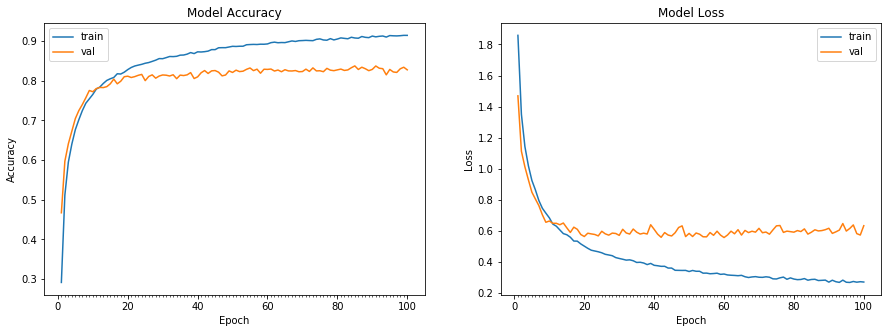

Accuracy on test data is: 82.71


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Model being improved based on lessons from EVA

In [0]:
#CORRECTED NETWORK
model = Sequential()

#Convolution Block 1
model.add(Convolution2D(64, 3, 3, input_shape=(32,32,3)))     #Receptive Field:  3;   Input Channels:  3;  Resol:  30
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Convolution2D(128, 3))                           #Receptive Field:  5;   Input Channels:  32;  Resol:  28
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Convolution2D(256, 3))                           #Receptive Field:  7;   Input Channels: 64;  Resol:  26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

#Transition Block 1
model.add(Convolution2D(256, 1, activation='relu'))                           #Receptive Field:  7;   Input Channels: 128;  Resol:  26
model.add(MaxPooling2D(2,2))                                                    #Receptive Field: 14;   Input Channels: 128;  Resol:  13

#Convolution Block 2
model.add(Convolution2D(64, 3))                            #Receptive Field: 16;   Input Channels: 128;  Resol:  11
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Convolution2D(128, 3))                           #Receptive Field: 18;   Input Channels:  32;  Resol:  9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Convolution2D(256, 3))                           #Receptive Field: 20;   Input Channels: 64;  Resol:  7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

#Final Layers
model.add(Convolution2D(10, 7))                                                 #Receptive Field: 28;   Input Channels: 128;  Resol:  1
model.add(Flatten())
model.add(Activation('softmax'))

#MODEL ARCHITECTURE SUMMARY
model.summary()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3...)`
  after removing the cwd from sys.path.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
batch_normalization_37 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
activation_21 (Activation)   (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
batch_normalization_38 (Batc (None, 28, 28, 128)       512       
_________________________________________________________________
activation_22 (Activation)   (None, 28, 28, 128)       0         
__________

In [0]:
# #Compile the model:
# model.compile(optimizer=Adam(lr=0.003), loss='categorical_crossentropy', metrics=['accuracy'])

# #Callbacks
# checkpointfilepath = "eva_assignment6a.hdf5"
# checkpoint = ModelCheckpoint(checkpointfilepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint, LearningRateScheduler(scheduler, verbose=1)]

# #Image Normalizer
# datagen1 = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# datagen1.fit(train_features)
# datagen1.fit(test_features)
# train_iterator = datagen1.flow(train_features, train_labels, batch_size=128, shuffle=False)
# test_iterator = datagen1.flow(test_features, test_labels, batch_size=128, shuffle=False)


# #Train Model
# new_model_info = model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), epochs=30, verbose=1, 
#                                      validation_data=(test_features, test_labels), callbacks=callbacks_list)
# plot_model_history(model_info)

### Run the improved model

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 55s 1ms/step - loss: 1.5104 - acc: 0.4780 - val_loss: 1.5487 - val_acc: 0.4621

Epoch 00001: val_acc improved from -inf to 0.46210, saving model to eva_assignment6a.hdf5
Epoch 2/30
50000/50000 [==============================] - 50s 1ms/step - loss: 1.0051 - acc: 0.6478 - val_loss: 1.0567 - val_acc: 0.6308

Epoch 00002: val_acc improved from 0.46210 to 0.63080, saving model to eva_assignment6a.hdf5
Epoch 3/30
50000/50000 [==============================] - 51s 1ms/step - loss: 0.8375 - acc: 0.7101 - val_loss: 1.2327 - val_acc: 0.5830

Epoch 00003: val_acc did not improve from 0.63080
Epoch 4/30
50000/50000 [==============================] - 50s 1ms/step - loss: 0.7313 - acc: 0.7484 - val_loss: 0.8149 - val_acc: 0.7175

Epoch 00004: val_acc improved from 0.63080 to 0.71750, saving model to eva_assignment6a.hdf5
Epoch 5/30
50000/50000 [==============================] - 51s 1ms/step -

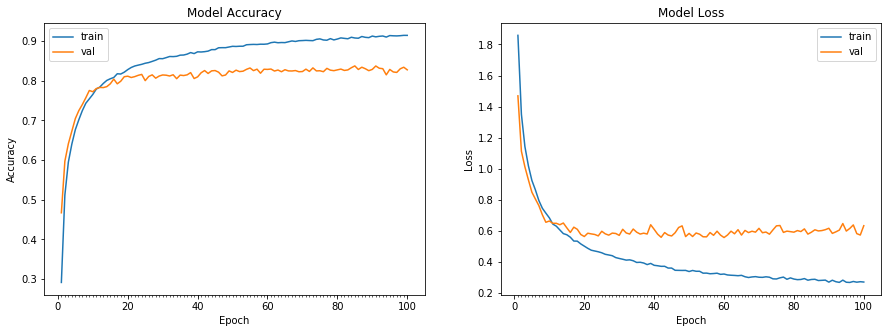

In [0]:
#Compile the model:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Callbacks
checkpointfilepath = "eva_assignment6a.hdf5"
checkpoint = ModelCheckpoint(checkpointfilepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


#Train Model
new_model_info = model.fit(train_features, train_labels, epochs=30, verbose=1, 
                                     validation_data=(test_features, test_labels), callbacks=callbacks_list)
plot_model_history(model_info)

### Check Accuracy

In [0]:
model.load_weights(checkpointfilepath)

loss, acc = model.evaluate(test_features, test_labels, verbose=0)

#score = model.evaluate(X_test, Y_test, verbose=0)
print(loss, acc)

0.6336327178955078 0.8281
